# Importing library

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading data

In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/COUNT/titanic.csv', usecols=[1, 2, 3, 4])
df.head()

,class,age,sex,survived
0,1st class,adults,man,yes
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes


# Analysing data

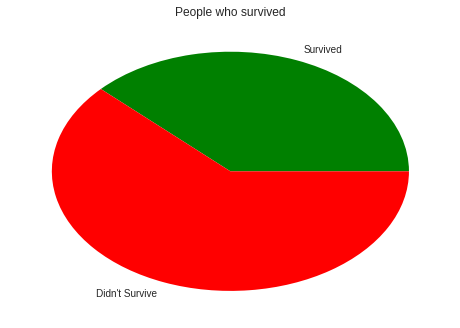

In [3]:
plt.pie([np.sum(df['survived'] == 'yes'), np.sum(df['survived'] == 'no')], colors=['g', 'r'], labels=['Survived', "Didn't Survive"])
plt.title('People who survived')
plt.show()

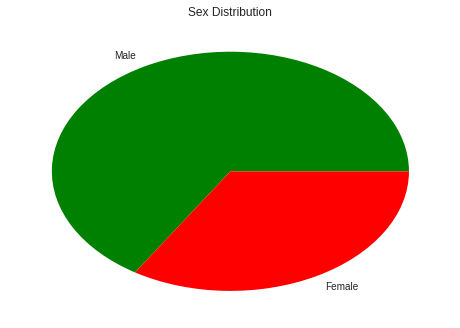

In [4]:
plt.pie([np.sum(df['sex'] == 'man'), np.sum(df['sex'] == 'women')], colors=['g', 'r'], labels=['Male', "Female"])
plt.title('Sex Distribution')
plt.show()

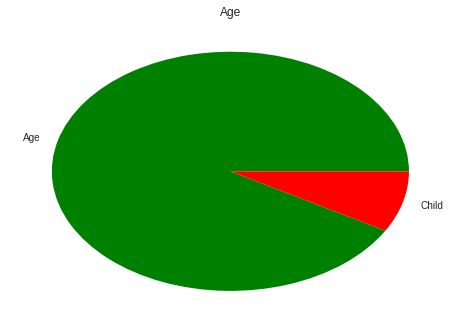

In [5]:
plt.pie([np.sum(df['age'] == 'adults'), np.sum(df['age'] == 'child')], colors=['g', 'r'], labels=['Age', "Child"])
plt.title('Age')
plt.show()

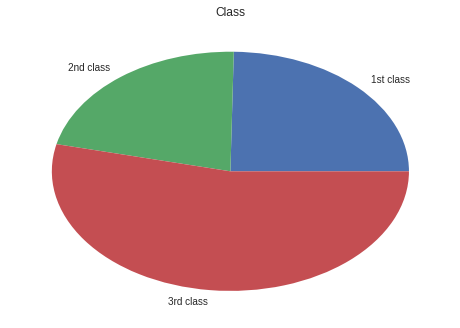

In [6]:
plt.pie([np.sum(df['class'] == '1st class'), np.sum(df['class'] == '2nd class'), np.sum(df['class'] == '3rd class')], labels=['1st class', '2nd class', '3rd class'])
plt.title('Class')
plt.show()

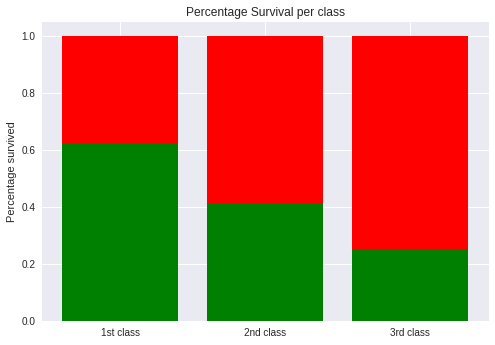

In [7]:
plt.bar(np.arange(3), [np.mean(df[df['class'] == '1st class']['survived'] == 'yes'), np.mean(df[df['class'] == '2nd class']['survived'] == 'yes'), np.mean(df[df['class'] == '3rd class']['survived'] == 'yes')], color='g', tick_label=['1st class', '2nd class', '3rd class'])
plt.bar(np.arange(3), height = [np.mean(df[df['class'] == '1st class']['survived'] == 'no'), np.mean(df[df['class'] == '2nd class']['survived'] == 'no'), np.mean(df[df['class'] == '3rd class']['survived'] == 'no')], bottom = [np.mean(df[df['class'] == '1st class']['survived'] == 'yes'), np.mean(df[df['class'] == '2nd class']['survived'] == 'yes'), np.mean(df[df['class'] == '3rd class']['survived'] == 'yes')], color='r', tick_label=['1st class', '2nd class', '3rd class'])
plt.title('Percentage Survival per class')
plt.ylabel('Percentage survived')
plt.show()

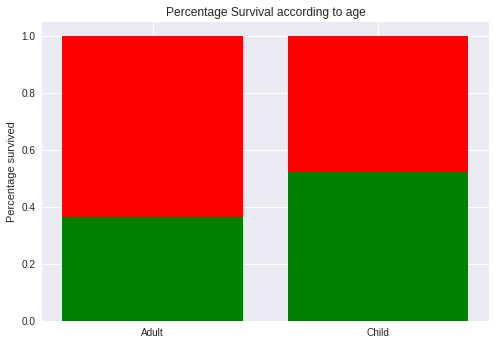

In [8]:
plt.bar(np.arange(2), [np.mean(df[df['age'] == 'adults']['survived'] == 'yes'), np.mean(df[df['age'] == 'child']['survived'] == 'yes')], color='g', tick_label=['Adult', 'Child'])
plt.bar(np.arange(2), [np.mean(df[df['age'] == 'adults']['survived'] == 'no'), np.mean(df[df['age'] == 'child']['survived'] == 'no')], bottom = [np.mean(df[df['age'] == 'adults']['survived'] == 'yes'), np.mean(df[df['age'] == 'child']['survived'] == 'yes')], color='r', tick_label=['Adult', 'Child'])
plt.title('Percentage Survival according to age')
plt.ylabel('Percentage survived')
plt.show()

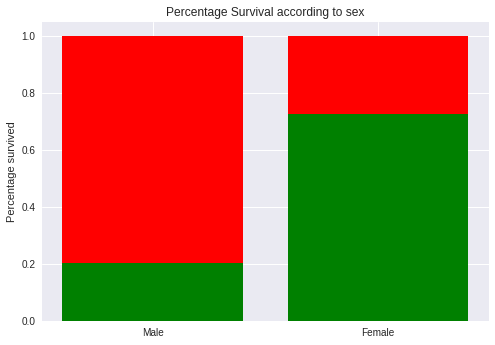

In [9]:
plt.bar(np.arange(2), [np.mean(df[df['sex'] == 'man']['survived'] == 'yes'), np.mean(df[df['sex'] == 'women']['survived'] == 'yes')], color='g', tick_label=['Male', 'Female'])
plt.bar(np.arange(2), [np.mean(df[df['sex'] == 'man']['survived'] == 'no'), np.mean(df[df['sex'] == 'women']['survived'] == 'no')], bottom = [np.mean(df[df['sex'] == 'man']['survived'] == 'yes'), np.mean(df[df['sex'] == 'women']['survived'] == 'yes')], color='r', tick_label=['Male', 'Female'])
plt.title('Percentage Survival according to sex')
plt.ylabel('Percentage survived')
plt.show()

# Preprocessing

In [10]:
X = df.drop('survived', axis=1)
y = df['survived']

## Converting categorical features into numeric forms

In [11]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

class_le = LabelEncoder()
class_le = class_le.fit(np.unique(X['class']))
X['class'] = class_le.transform(X['class'])

age_le = LabelEncoder()
age_le = age_le.fit(np.unique(X['age']))
X['age'] = age_le.transform(X['age'])

sex_le = LabelEncoder()
sex_le = sex_le.fit(np.unique(X['sex']))
X['sex'] = sex_le.transform(X['sex'])

survived_le = LabelEncoder()
survived_le = survived_le.fit(np.unique(y))
y = survived_le.transform(y)

from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
enc.fit(X)
X = enc.transform(X).toarray()

# Training and testing model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)


In [15]:
print("Train error:", clf.score(X_train, y_train))
print("Test error:", clf.score(X_test, y_test))

Train error: 0.774158523344
Test error: 0.784810126582


## Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


In [17]:
print("Train error:", clf.score(X_train, y_train))
print("Test error:", clf.score(X_test, y_test))

Train error: 0.795874049946
Test error: 0.80253164557


## Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf = clf.fit(X_train, y_train)


In [19]:
print("Train error:", clf.score(X_train, y_train))
print("Test error:", clf.score(X_test, y_test))

Train error: 0.774158523344
Test error: 0.784810126582
